In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 1.Cargar datos
data = pd.read_csv("athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Analisis Exploratorio de Datos¶
1. Cargar los datos
2. Revision inicial
3. Resumen estadistico
4. Visualizacion inicial
5. Valores faltantes
6. Analisis de distribucion
7. Identificacion de valores atipicos
8. Analisis de relaciones
9. Segmentacion y agrupacion
10. Iteracion y descubrimiento
11. Documentacion y comunicacion

## Descripción del conjunto de datos

In [11]:
# Datos de filas y columnas
data.shape

(271116, 15)

### Preguntas o disparadores
1. ¿Cuantas medallas se han dado en cada categoria?
2. ¿Que deporte son los mas populares?
3. ¿Cuantos hombres y mujeres han participado en los juegos olimpicos?

In [13]:
# 2.revición inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [14]:
# 3.Resumen estadistico
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Manejo de datos faltantes 

In [16]:
# Selecciona todas las columnas numéricas del DataFrame 'data'
numeric_columns = data.select_dtypes(include=["number"])

# Itera a través de cada columna numérica
for column in numeric_columns.columns:
    # Rellena los valores nulos (NaN) en la columna actual con la media de la misma
    data[column] = data[column].fillna(data[column].mean())


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [18]:
# Rellena los valores nulos (NaN) en la columna 'Medal' con la cadena 'Sin medalla'
data["Medal"] = data["Medal"].fillna("Sin medalla")


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [20]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


## Analisis de distribucion

<Axes: xlabel='Age', ylabel='Count'>

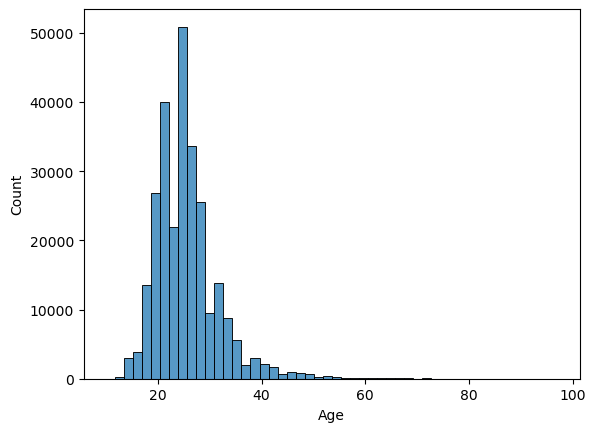

In [22]:
# Genera un histograma de la columna 'Age' con 50 intervalos (bins) utilizando seaborn
sns.histplot(data=data, x="Age", bins=50)


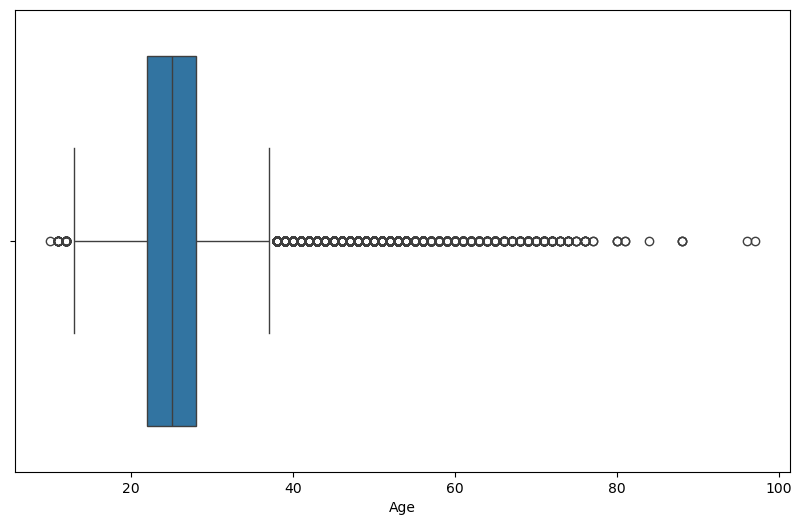

In [23]:
# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(10,6))

# Crea un diagrama de caja (boxplot) para la columna 'Age'
sns.boxplot(x=data["Age"])

# Muestra el gráfico
plt.show()

In [24]:
from scipy import stats

In [25]:
# Rango intercuartilico
stats.iqr(data["Age"])

6.0

In [26]:
# Edad max
28 + (1.5*6)

37.0

In [27]:
# Edad min
22 - (1.5*6)

13.0

In [28]:
# Atletas que superan los 37 años
atletas_mayores = data[data["Age"] > 37]
atletas_mayores.shape

(11928, 15)

In [29]:
# Altetas menores a 13
atletas_menores = data[data["Age"] < 13]
atletas_menores.shape

(53, 15)

In [30]:
# Cuenta la cantidad de atletas mayores en cada deporte y muestra los 5 deportes más comunes
atletas_mayores["Sport"].value_counts().head()

Sport
Shooting            3178
Art Competitions    2226
Equestrianism       1997
Sailing             1040
Fencing             1031
Name: count, dtype: int64

In [31]:
atletas_menores["Sport"].value_counts()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Diving             1
Name: count, dtype: int64

Información de categorias

In [32]:
text_columns = data.select_dtypes(include=["object"])

In [33]:
text_columns.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [34]:
# Itera sobre todas las columnas de texto
for column in text_columns.columns:
    
    # Omite la columna "Name"
    if column != "Name":
        
        # Imprime las 5 categorías más comunes de la columna actual
        print(data[column].value_counts().head())
        
        # Añade una línea en blanco para separar la salida de cada columna
        print()

Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

City
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: count, dtype: int64

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: count, dtype: int64

Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: count, dtype: int64

Agrupar los Datos

In [36]:
# Agrupa los datos por la columna 'Year' y selecciona las columnas 'Age', 'Height' y 'Weight'
# Calcula el mínimo, máximo y promedio (media) de cada columna por cada año y muestra los últimos 5 resultados
data.groupby("Year")[["Age", "Height", "Weight"]].agg(["min", "max", "mean"]).tail()

Age                  Height                    Weight                  
       min   max       mean    min    max        mean    min    max       mean
Year                                                                          
2008  12.0  67.0  25.734092  137.0  226.0  176.201381   28.0  214.0  71.389552
2010  15.0  51.0  26.124262  149.0  206.0  174.918373   38.0  116.0  70.740654
2012  13.0  71.0  25.961378  140.0  221.0  176.250460   33.0  214.0  71.302389
2014  15.0  55.0  25.987324  146.0  206.0  174.818806   41.0  116.0  70.757539
2016  13.0  62.0  26.207919  133.0  218.0  176.025326   30.0  170.0  70.983974

In [37]:
# Agrupa los datos por 'Season' (Temporada) y 'Sex' (Género)
# Luego, calcula la edad mínima, máxima y promedio para cada grupo
data.groupby(["Season", "Sex"])["Age"].agg(["min", "max", "mean"])

min   max       mean
Season Sex                       
Summer F    11.0  74.0  23.674297
       M    10.0  97.0  26.396239
Winter F    11.0  48.0  24.015114
       M    12.0  58.0  25.504698

In [38]:
# Agrupa los datos por 'Season' (Temporada) y 'Sex' (Género)
# Luego, cuenta el número de valores únicos en las columnas 'Team', 'Sport' y 'Event'
data.groupby(["Season", "Sex"])[["Team", "Sport", "Event"]].nunique()


Team  Sport  Event
Season Sex                    
Summer F     352     40    214
       M    1118     49    491
Winter F     144     14     57
       M     214     17     67

Graficas

<Axes: xlabel='Height', ylabel='Weight'>

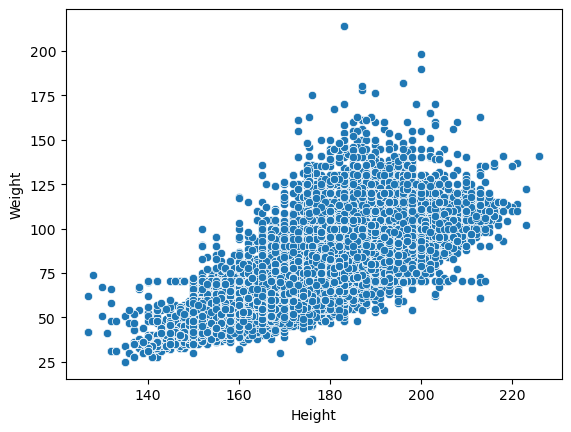

In [39]:
# Crea un diagrama de dispersión para visualizar la relación entre altura y peso
sns.scatterplot(data=data, x="Height", y="Weight")

<Axes: xlabel='Height', ylabel='Weight'>

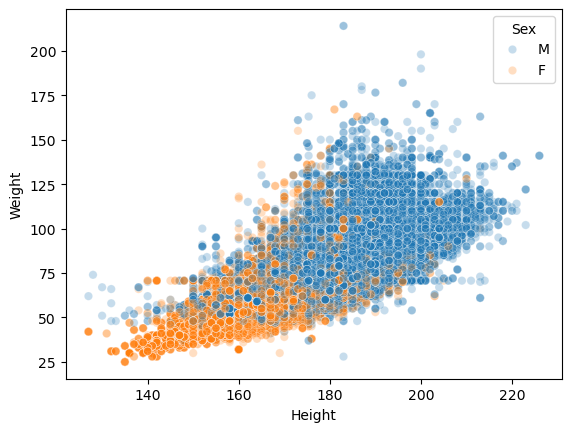

In [40]:
# Crea un diagrama de dispersión para visualizar la relación entre altura y peso,
# diferenciando por género y con puntos semi-transparentes
sns.scatterplot(data=data, x="Height", y="Weight", hue="Sex", alpha=0.25)


In [41]:
# Calcula la matriz de correlación para las columnas 'Age', 'Height' y 'Weight'
correlation_matrix = data[["Age", "Height", "Weight"]].corr()
print(correlation_matrix)


             Age    Height    Weight
Age     1.000000  0.106944  0.161847
Height  0.106944  1.000000  0.786609
Weight  0.161847  0.786609  1.000000


<Axes: >

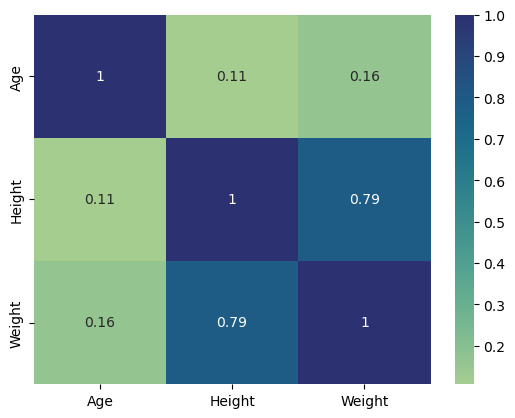

In [42]:
# Crea un mapa de calor para visualizar la matriz de correlación de las columnas 'Age', 'Height' y 'Weight'
sns.heatmap(data[["Age", "Height", "Weight"]].corr(), annot=True, cmap="crest")


Un valor cercano a 1 se representará en un color oscuro (indicación de una correlación positiva fuerte), mientras que un valor cercano a 0 se mostrará en un color más claro (indicación de una correlación débil).

<Axes: xlabel='Age', ylabel='Count'>

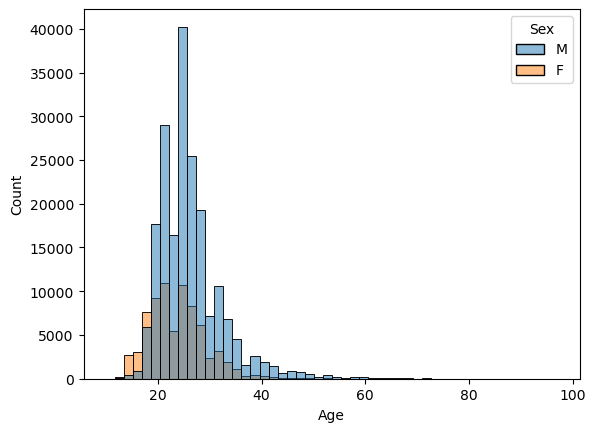

In [43]:
# Crea un histograma para visualizar la distribución de la edad, diferenciando por género
sns.histplot(data=data, x="Age", hue="Sex", bins=50)


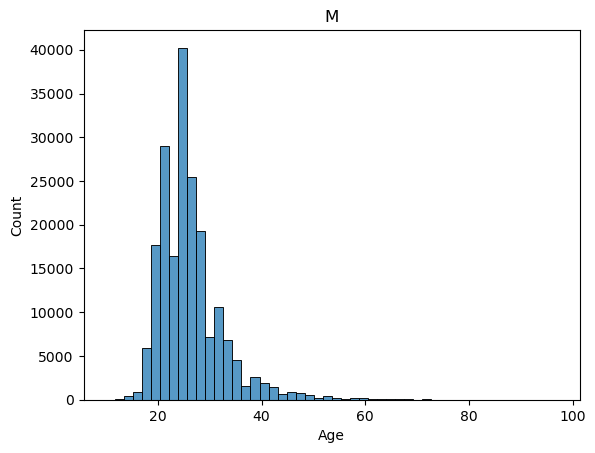

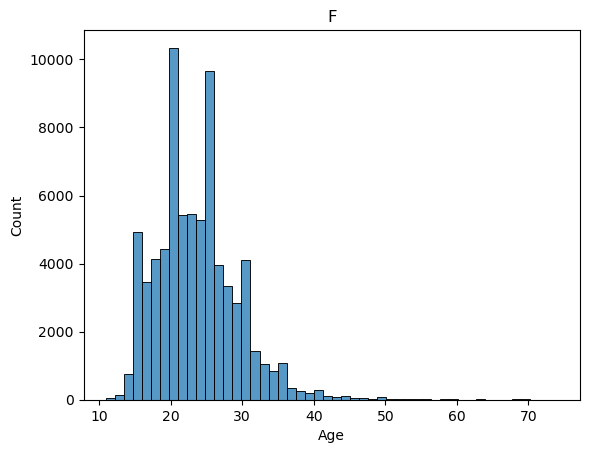

In [44]:
# Itera sobre cada género en la columna 'Sex' y genera un histograma para la distribución de la edad
for value in data["Sex"].value_counts().index:
    # Filtra el DataFrame para incluir solo los datos del género actual y crea un histograma
    sns.histplot(data=data[data["Sex"] == value], x="Age", bins=50)
    # Establece el título del gráfico como el género actual
    plt.title(value)
    # Muestra el gráfico
    plt.show()


Este código proporciona una manera efectiva de analizar y visualizar la distribución de la edad de los atletas en función de su género, facilitando la comparación entre diferentes grupos y ayudando a identificar patrones y tendencias específicas en los datos.

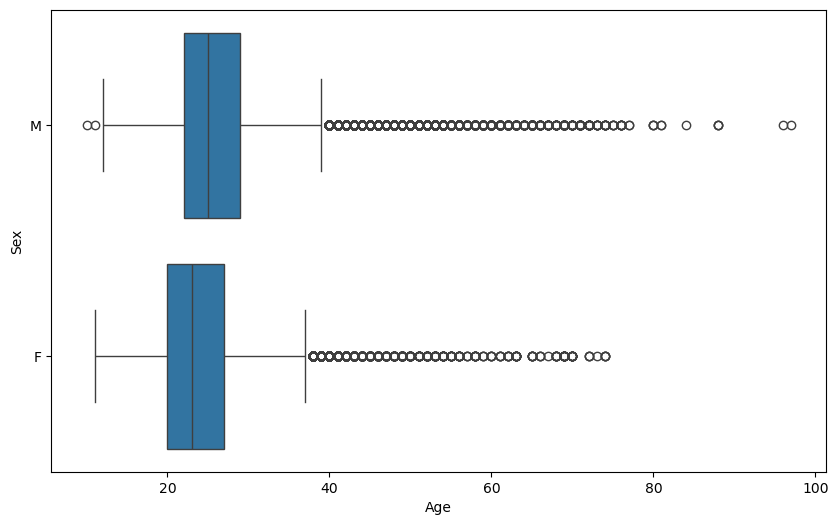

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="Age", y="Sex")
plt.show()

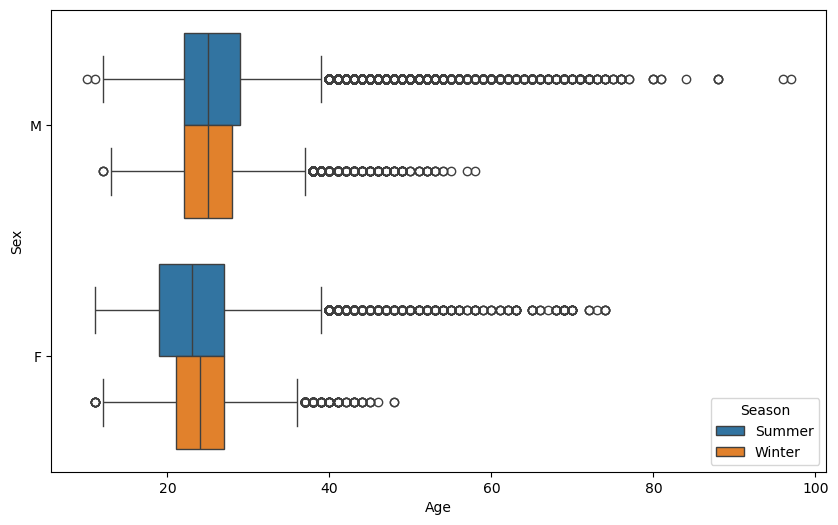

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="Age", y="Sex", hue="Season")
plt.show()

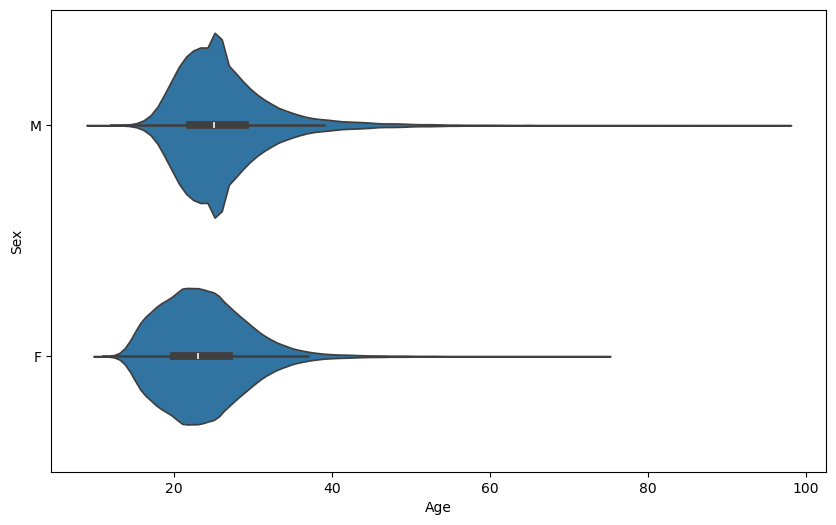

In [54]:
# Establece el tamaño de la figura para el gráfico
plt.figure(figsize=(10, 6))
# Crea un diagrama de violín para visualizar la distribución de la edad según el género
sns.violinplot(data=data, x="Age", y="Sex")
# Muestra el gráfico
plt.show()


<Axes: xlabel='Year', ylabel='Age'>

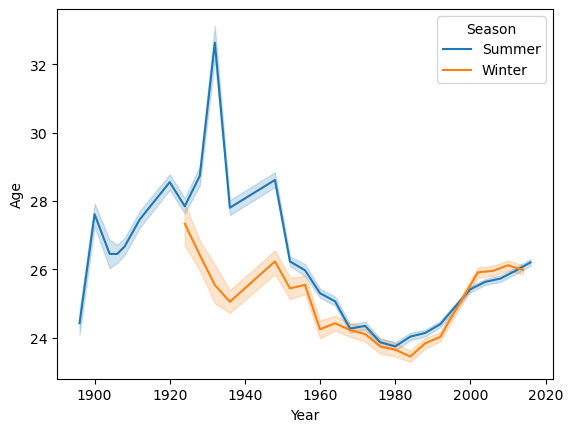

In [51]:
sns.lineplot(data=data, x="Year", y="Age", hue="Season")